In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import process_games

In [7]:
games = pd.read_csv(os.path.join(basepath,'data/games.csv'))

In [8]:
players = pd.read_csv(os.path.join(basepath,'data/players.csv')).set_index('nflId')

In [9]:
plays = pd.read_csv(os.path.join(basepath,'data/plays.csv'))

In [10]:
weeks = {}
for i in range(3):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join(basepath,'data',name+'-processed.csv'))

In [11]:
teams = process_games(games,plays)

In [12]:
team = teams['IND']

In [13]:
team.games

{'week1': <src.game.Game at 0x12dd31ba8>,
 'week2': <src.game.Game at 0x11fa515c0>,
 'week3': <src.game.Game at 0x11fa73160>,
 'week4': <src.game.Game at 0x11fb80f28>,
 'week5': <src.game.Game at 0x11fb96e80>,
 'week6': <src.game.Game at 0x11fdc2be0>,
 'week7': <src.game.Game at 0x11fdd44a8>,
 'week8': <src.game.Game at 0x11fdf0be0>,
 'week10': <src.game.Game at 0x11fe169e8>,
 'week11': <src.game.Game at 0x11fe26f28>,
 'week12': <src.game.Game at 0x11fe424a8>,
 'week13': <src.game.Game at 0x11fe5c6a0>,
 'week14': <src.game.Game at 0x11fe6c940>,
 'week15': <src.game.Game at 0x11fe88748>,
 'week16': <src.game.Game at 0x11fe91c88>,
 'week17': <src.game.Game at 0x11feb6be0>}

In [14]:
team.process_weeks(weeks)

/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/sr

In [15]:
game = team.games['week1']
game.list_plays()

Play 1: (14:11) (Shotgun) A.Dalton pass short left intended for J.Mixon INTERCEPTED by K.Moore II at CIN 39. K.Moore II to CIN 7 for 32 yards (A.Dalton).
Play 2: (12:32) A.Dalton pass short right to T.Eifert pushed ob at CIN 40 for 29 yards (M.Hooker).
Play 3: (11:17) (Shotgun) A.Dalton pass short left to J.Mixon to IND 32 for 21 yards (C.Geathers).
Play 4: (9:58) A.Dalton pass short right to A.Green to IND 22 for 5 yards (N.Hairston).
Play 5: (8:35) (Shotgun) A.Dalton pass incomplete deep right to J.Ross.
Play 6: (8:30) (Shotgun) A.Dalton pass incomplete short middle to T.Boyd (J.Sheard).
Play 7: (1:23) A.Dalton pass short right to J.Mixon to CIN 33 for 8 yards (N.Hairston).
Play 8: (:58) (No Huddle, Shotgun) A.Dalton pass short right to T.Kroft to CIN 42 for 9 yards (A.Walker, D.Leonard).
Play 9: (:11) (Shotgun) A.Dalton pass short left to A.Green to IND 45 for 13 yards (M.Farley). FUMBLES (M.Farley), touched at IND 45, RECOVERED by IND-D.Leonard at IND 42. D.Leonard to IND 42 for no

In [16]:
for play in game.plays:
    play.process_players(players)
    if play.hasForwardPass:
        play.find_dropback_events()

In [17]:
play_number = 22

In [18]:
play = game.plays[play_number - 1]

In [22]:
play.play_data

gameId                                                           2018090902
playId                                                                 2824
playDescription           (4:18) A.Dalton pass deep left to A.Green for ...
quarter                                                                   3
down                                                                      1
yardsToGo                                                                10
possessionTeam                                                          CIN
playType                                                     play_type_pass
yardlineSide                                                            IND
yardlineNumber                                                           38
offenseFormation                                                 SINGLEBACK
personnelO                                                 1 RB, 2 TE, 2 WR
defendersInTheBox                                                         6
numberOfPass

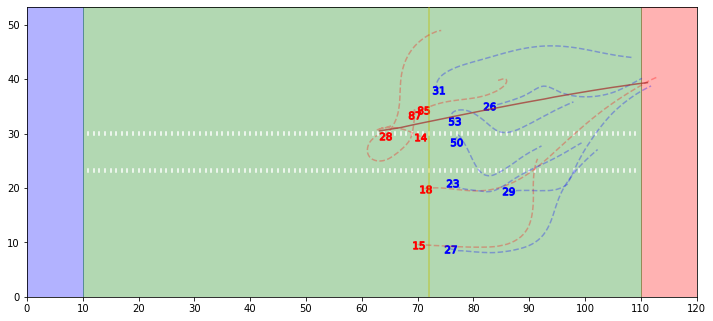

In [19]:
play.plot_play(markers='number')

In [20]:
play.find_initial_locks()

Quincy Wilson (CB-31)
  Horizontal distance to C.J. Uzomah = 3.4
  Horizontal distance to Tyler Eifert = 3.6
  Horizontal distance to Joe Mixon = 8.5
Clayton Geathers (FS-26)
  Horizontal distance to C.J. Uzomah = 0.5
  Horizontal distance to Tyler Eifert = 0.7
  Horizontal distance to Joe Mixon = 5.6
Nate Hairston (CB-27)
  Horizontal distance to John Ross = -1.1
    Nate Hairston (CB-27) covering John Ross (WR-15)
Malik Hooker (FS-29)
  Horizontal distance to A.J. Green = -0.5
Kenny Moore II (CB-23)
  Horizontal distance to A.J. Green = 1.0
    Kenny Moore II (CB-23) covering A.J. Green (WR-18)


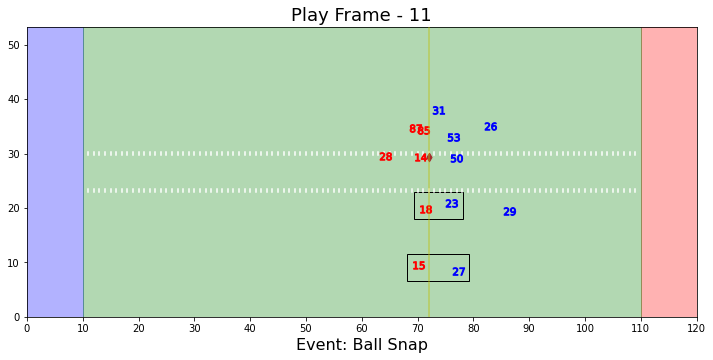

In [21]:
play.plot_play_frame(index='ball_snap',show_coverage=True,markers='number')

In [23]:
play.events

{'ball_snap': 11,
 'play_action': 24,
 'pass_forward': 45,
 'pass_arrived': 71,
 'pass_outcome_touchdown': 74,
 'peak_dropback': 25,
 'end_dropback': 34}